In [22]:
#import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('marketing_campaign.csv',delimiter =';',na_values=['Not Available','unknown'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [24]:
df['total_household'] = df['Kidhome'] + df['Teenhome'] + 1
df['Marital_Status'].unique()
df.loc[df['Marital_Status'].isin(['Married', 'Together']), 'total_household'] += 1
df = df.drop(columns=['Kidhome','Teenhome','Z_CostContact','Z_Revenue'])

In [25]:
df.loc[df['Income'] > 200000, 'Income'] = 66666
df['total_purchased'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['total_spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']

# Which Campaigns are the most successful?

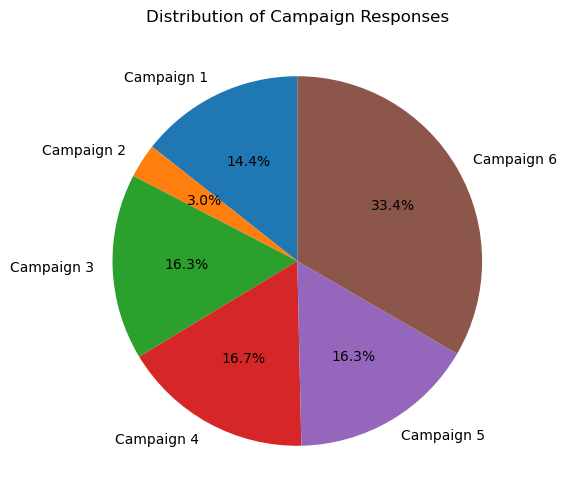

In [32]:
cmp = np.array([])

cmp = np.append(cmp, ['Campaign 1'] * len(df[df['AcceptedCmp1'] == 1]))
cmp = np.append(cmp, ['Campaign 2'] * len(df[df['AcceptedCmp2'] == 1]))
cmp = np.append(cmp, ['Campaign 3'] * len(df[df['AcceptedCmp3'] == 1]))
cmp = np.append(cmp, ['Campaign 4'] * len(df[df['AcceptedCmp4'] == 1]))
cmp = np.append(cmp, ['Campaign 5'] * len(df[df['AcceptedCmp5'] == 1]))
cmp = np.append(cmp, ['Campaign 6'] * len(df[df['Response'] == 1]))

unique_campaigns, counts = np.unique(cmp, return_counts=True)
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=unique_campaigns, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Campaign Responses') 
plt.show()

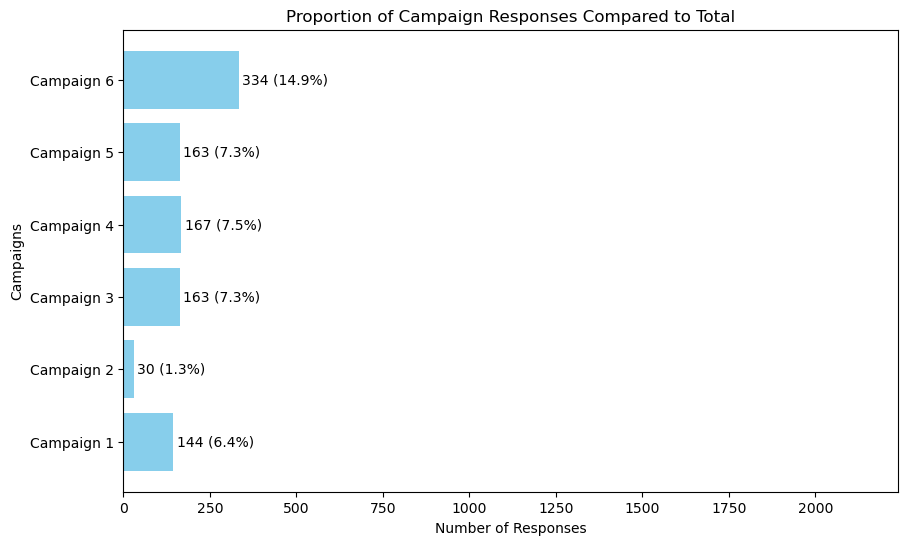

In [33]:
total_responses=2240
plt.figure(figsize=(10, 6))
bars = plt.barh(unique_campaigns, counts, color='skyblue')
for bar, count in zip(bars, counts):
    percentage = (count / total_responses) * 100
    plt.text(bar.get_width() + 10,
             bar.get_y() + bar.get_height() / 2, 
             f'{count} ({percentage:.1f}%)',va='center')

plt.xlabel('Number of Responses')
plt.ylabel('Campaigns')
plt.title('Proportion of Campaign Responses Compared to Total')
plt.xlim(0, total_responses)
plt.show()

### Campaigns 3, 4, and 5 had consistent results, however, the final campaign outperformed every preceeding one. Campaign 6 more than doubled the amount of responses received. 

## Which demographics did Campaign 6 have the most success with?

In [28]:
df.loc[df['Marital_Status'].isin(['Alone','Absurd','YOLO']), 'Marital_Status'] = 'Single'
df['age'] = 2015-df['Year_Birth']
df.loc[df['Education'].isin(['Graduation']), 'Education'] = 'Bachelors'
df.loc[df['Education'].isin(['2n Cycle']), 'Education'] = 'Master'

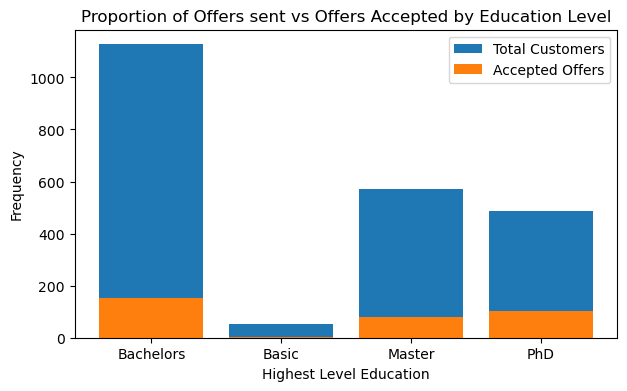

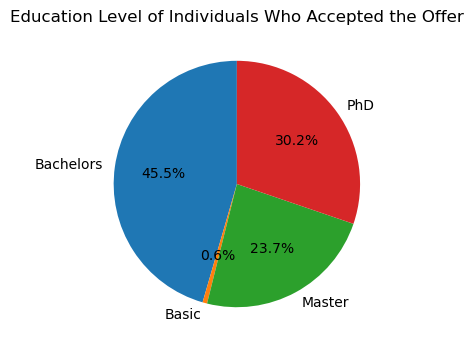

In [30]:
plt.figure(figsize=(7, 4))
unique_campaigns, counts = np.unique(df['Education'], return_counts=True)
plt.bar(unique_campaigns,counts,label='Total Customers')
unique_campaigns, counts = np.unique(df.loc[df['Response'].isin([1]), 'Education'], return_counts=True)
plt.bar(unique_campaigns,counts,label='Accepted Offers')
plt.title('Proportion of Offers sent vs Offers Accepted by Education Level')
plt.xlabel('Highest Level Education')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(7, 4))
plt.pie(counts, labels=unique_campaigns, autopct='%1.1f%%', startangle=90)
plt.title('Education Level of Individuals Who Accepted the Offer')
plt.show()

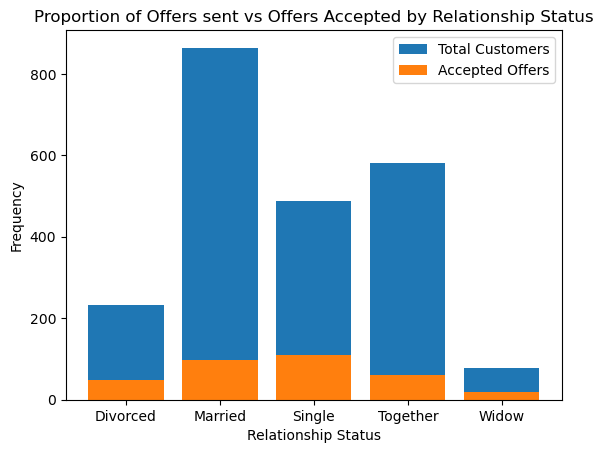

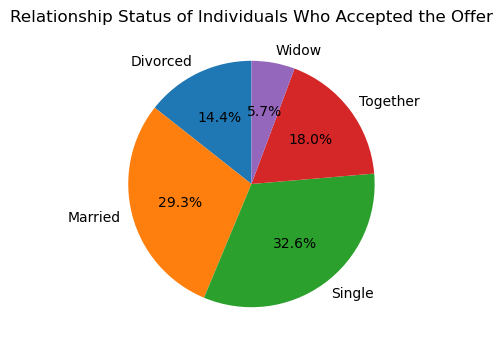

In [9]:
unique_campaigns, counts = np.unique(df['Marital_Status'], return_counts=True)
plt.bar(unique_campaigns,counts,label='Total Customers')
unique_campaigns, counts = np.unique(df.loc[df['Response'].isin([1]), 'Marital_Status'], return_counts=True)
plt.bar(unique_campaigns,counts,label='Accepted Offers')
plt.title('Proportion of Offers sent vs Offers Accepted by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Frequency')
plt.legend()
plt.show()


plt.figure(figsize=(7, 4))
plt.pie(counts, labels=unique_campaigns, autopct='%1.1f%%', startangle=90)
plt.title('Relationship Status of Individuals Who Accepted the Offer')
plt.show()

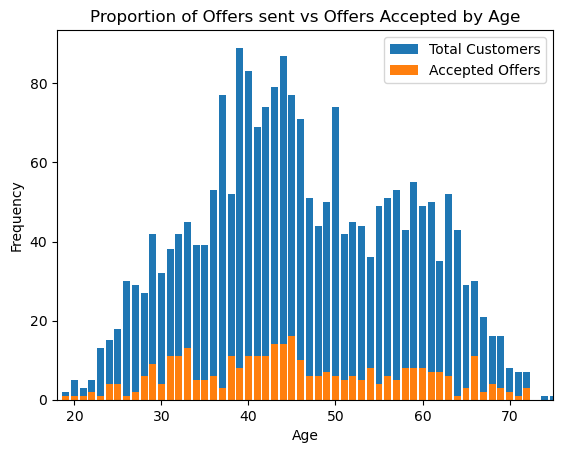

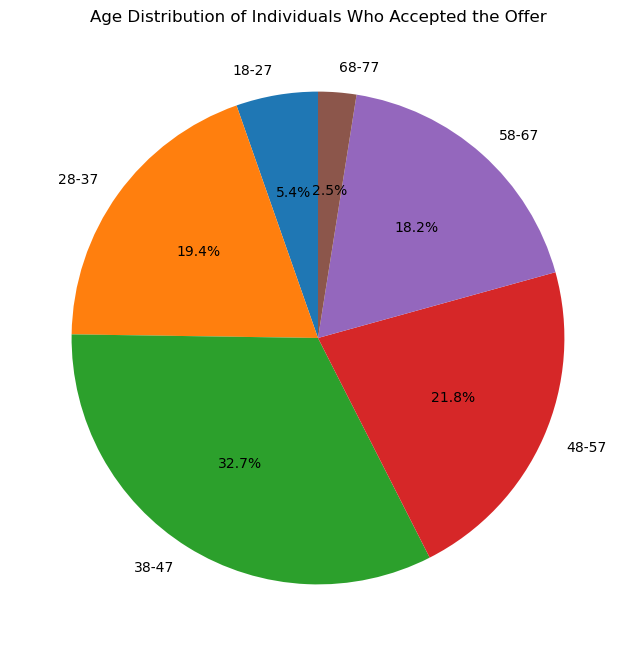

In [10]:
unique_campaigns, counts = np.unique(df['age'], return_counts=True)
plt.bar(unique_campaigns,counts,label='Total Customers')
unique_campaigns, counts = np.unique(df.loc[df['Response'].isin([1]), 'age'], return_counts=True)
plt.bar(unique_campaigns,counts,label='Accepted Offers')
plt.title('Proportion of Offers sent vs Offers Accepted by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim([18,75])
plt.legend()
plt.show()


bins = range(18, 79, 10)
labels = [f'{i}-{i+9}' for i in range(18, 78, 10)]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_group_counts = df['age_group'].value_counts(sort=False)
plt.figure(figsize=(10, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution of Individuals Who Accepted the Offer')
plt.show()

### Campaign 6 had the most success with customers who had a Bachelor's degree, those that were single, and those between the ages of 38-47. 

### Bachelor's degree holders are both the most represented and the most responsive group, making them a key focus for future marketing campaigns. PhD and Master’s degree holders also represent a substantial portion of accepted offers, suggesting that higher education levels are positively correlated with offer acceptance. Individuals with Basic education are a very small target and have minimal engagement, indicating they may require a different strategy or are not a priority group for these offers.

### Single and Married individuals are the primary target groups in terms of both the total offers sent and accepted offers, with Single individuals leading in terms of acceptance rates relative to their total size. While Married individuals make up a larger proportion of customers in the database, their acceptance rates seem lower relative to the total number of offers.

### The 38-57 age range is the most successful demographic in terms of accepting offers, making it a key target group for future campaigns. Older individuals (58+) are less likely to accept offers despite being targeted, so this group may require different marketing strategies to increase acceptance rates. Younger individuals (under 37) represent a smaller share of both offers sent and accepted, but their acceptance rate remains stable, suggesting potential for growth if targeted more strategically.

# How does Income and Household size impact purchasing power?

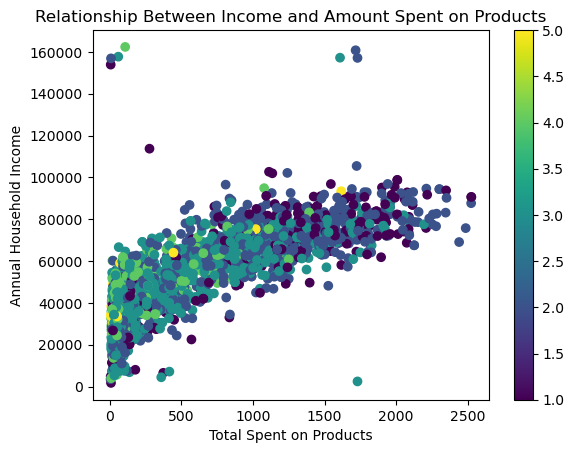

In [11]:
plt.xlabel('Total Spent on Products')
plt.ylabel('Annual Household Income')
plt.title('Relationship Between Income and Amount Spent on Products')
plt.scatter(df['total_spent'],df['Income'],c=df['total_household'])
plt.colorbar()
plt.show()

In [12]:
correlation = df[['total_spent', 'Income','total_household']].corr()
print(correlation)

                 total_spent    Income  total_household
total_spent         1.000000  0.792142        -0.422907
Income              0.792142  1.000000        -0.286527
total_household    -0.422907 -0.286527         1.000000


### There is a clear correlation between income and the total amount spent on products. With a correlation coefficient of +0.79 as income increases households are willing to buy more products. However, there is only a slight moderate negative correlation between household size and amount spent, suggesting that income is the limiting factor on spending.

# Does internet access increase purchase frequency?

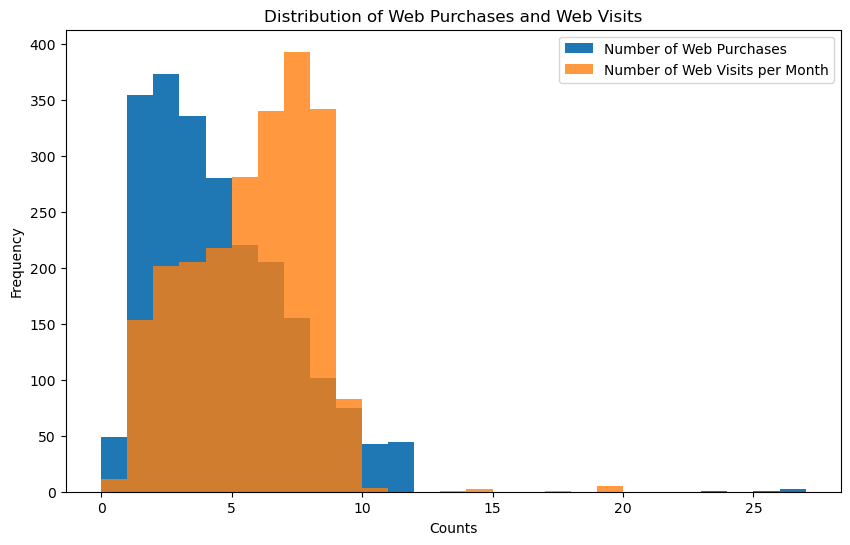

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['NumWebPurchases'], bins=df['NumWebPurchases'].max(), alpha=1, label='Number of Web Purchases')
plt.hist(df['NumWebVisitsMonth'], bins=df['NumWebVisitsMonth'].max(), alpha=0.8, label='Number of Web Visits per Month')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Web Purchases and Web Visits')
plt.legend(loc='upper right')
plt.show()

In [14]:
correlation = df[['NumWebPurchases', 'NumWebVisitsMonth']].corr()
print(correlation)

                   NumWebPurchases  NumWebVisitsMonth
NumWebPurchases           1.000000          -0.055846
NumWebVisitsMonth        -0.055846           1.000000


### Surprisingly, there seems to be little to no direct correlation between the 2 variables.

# How has customer demographic changed over time?

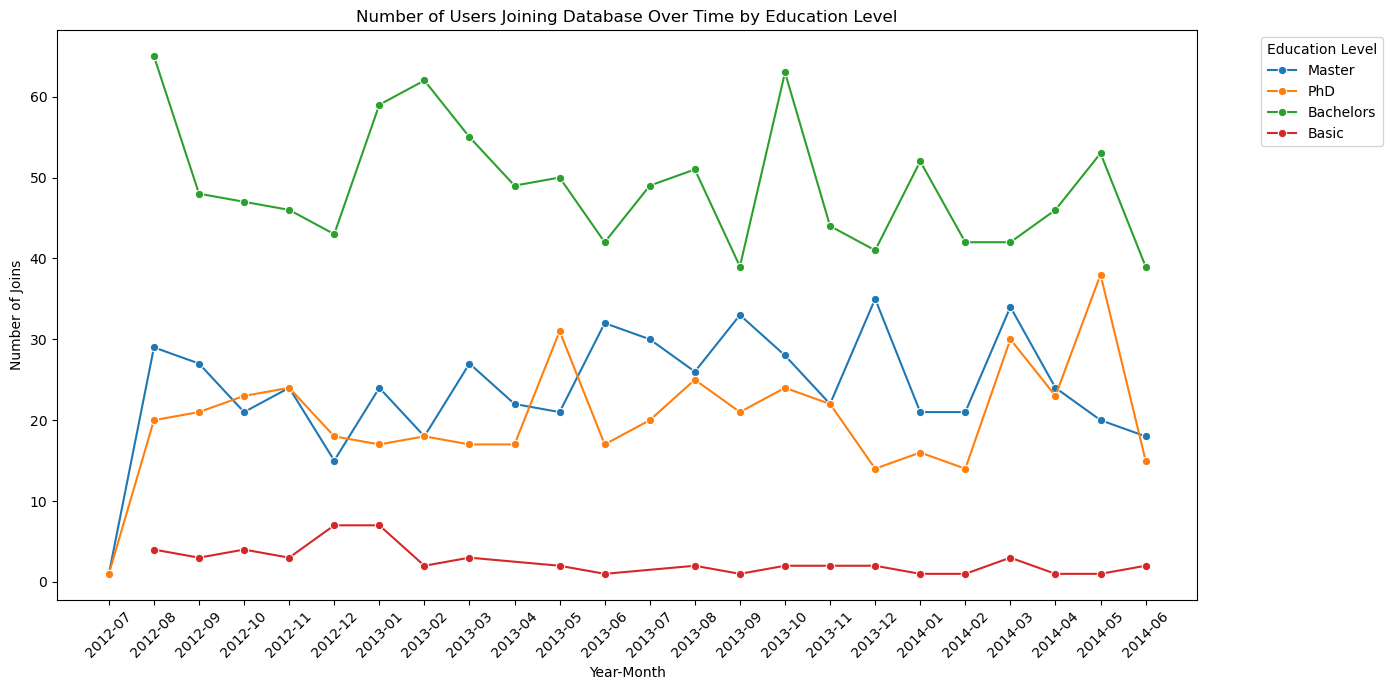

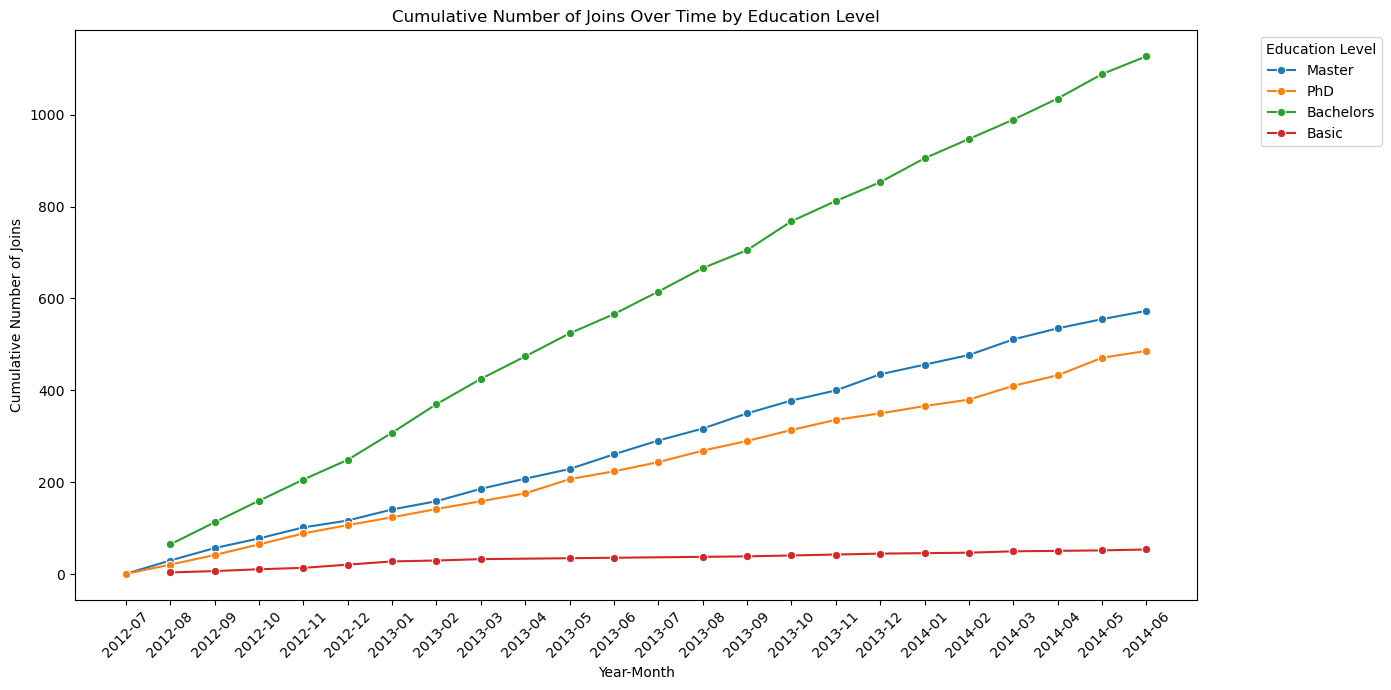

In [15]:
df['join_date'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df['join_year_month'] = df['join_date'].dt.to_period('M').astype(str)
join_count = df.groupby(['join_year_month', 'Education']).size().reset_index(name='join_count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=join_count, x='join_year_month', y='join_count', hue='Education', marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Joins')
plt.title('Number of Users Joining Database Over Time by Education Level')
plt.xticks(rotation=45)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

join_count['cumulative_join_count'] = join_count.groupby('Education')['join_count'].cumsum()
plt.figure(figsize=(14, 7))
sns.lineplot(data=join_count, x='join_year_month', y='cumulative_join_count', hue='Education', marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Number of Joins')
plt.title('Cumulative Number of Joins Over Time by Education Level')
plt.xticks(rotation=45)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

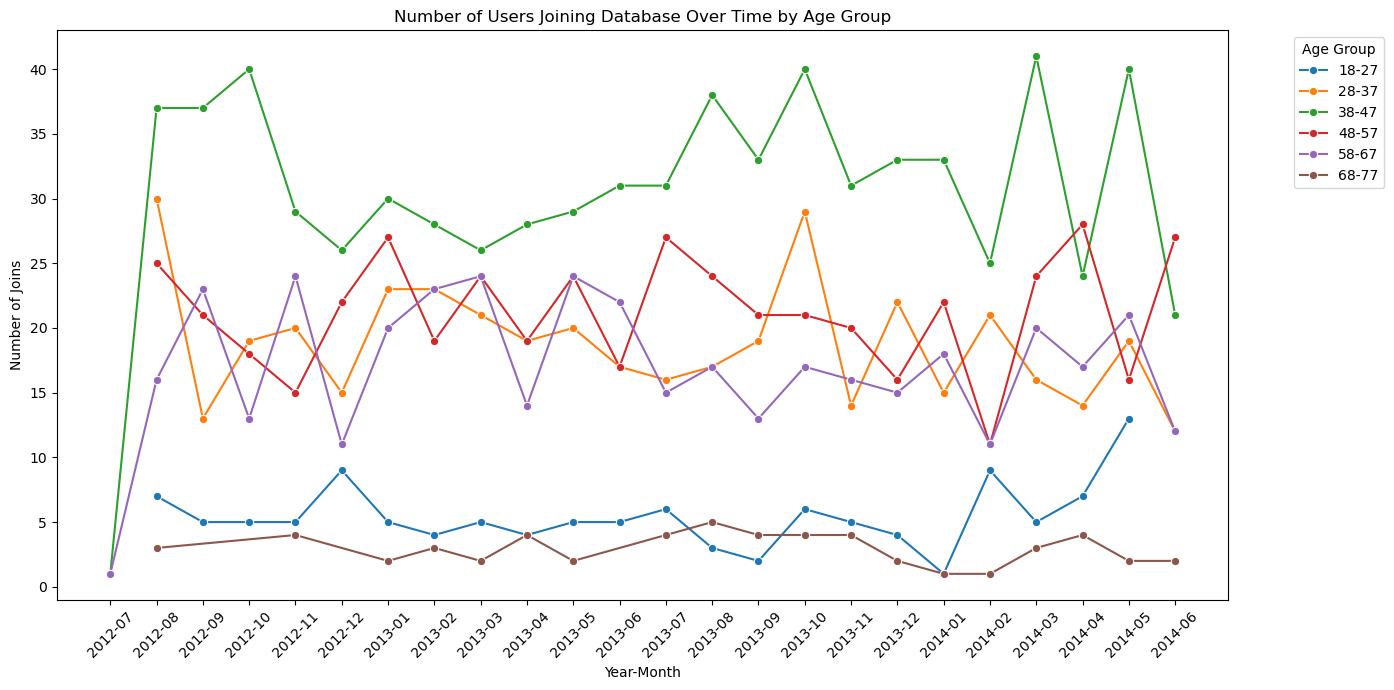

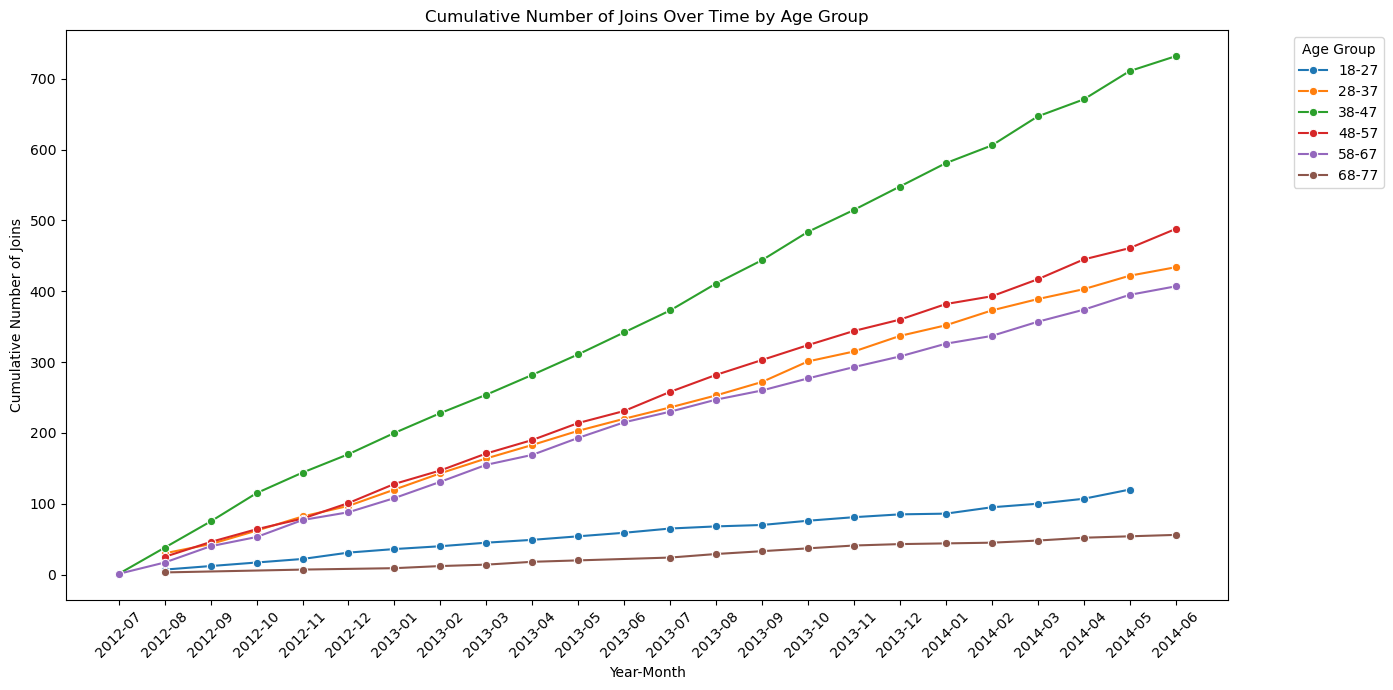

In [16]:
df['join_date'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df['join_year_month'] = df['join_date'].dt.to_period('M').astype(str)
join_count = df.groupby(['join_year_month', 'age_group'],observed=True).size().reset_index(name='join_count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=join_count, x='join_year_month', y='join_count', hue='age_group', marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Joins')
plt.title('Number of Users Joining Database Over Time by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

join_count['cumulative_join_count'] = join_count.groupby('age_group',observed=True)['join_count'].cumsum()
plt.figure(figsize=(14, 7))
sns.lineplot(data=join_count, x='join_year_month', y='cumulative_join_count', hue='age_group', marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Number of Joins')
plt.title('Cumulative Number of Joins Over Time by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### There are noticeable spikes and dips in the monthly joins for most age groups and Education Levels, particularly in the early months, which could indicate seasonal trends or specific events influencing user engagement during certain periods. 

### Again, the most engaged age group is 38-47, followed by 28-37, while the least engaged groups are the youngest (18-27) and the oldest (68-77). Marketing efforts or engagement strategies seem to resonate most with middle-aged individuals, while younger and older individuals may require different approaches to increase participation.

### The platform attracts the most users from individuals with higher education, particularly those holding a Master's or Bachelor's degree. These two groups are the most significant contributors to the growth of the user base. PhD holders, while fewer in number, show stable participation. However, individuals with Basic education represent a very small portion of the user base and may require different engagement strategies.

# How is each product performing?

<Figure size 1000x600 with 0 Axes>

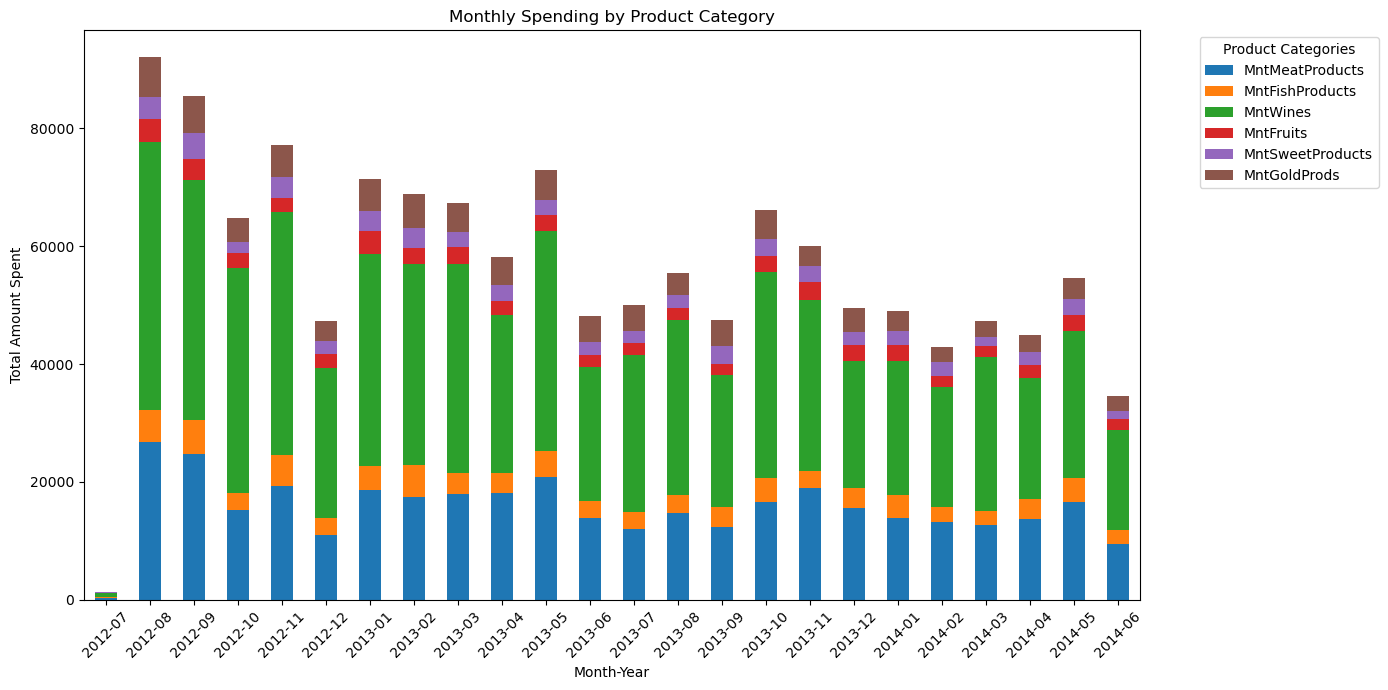

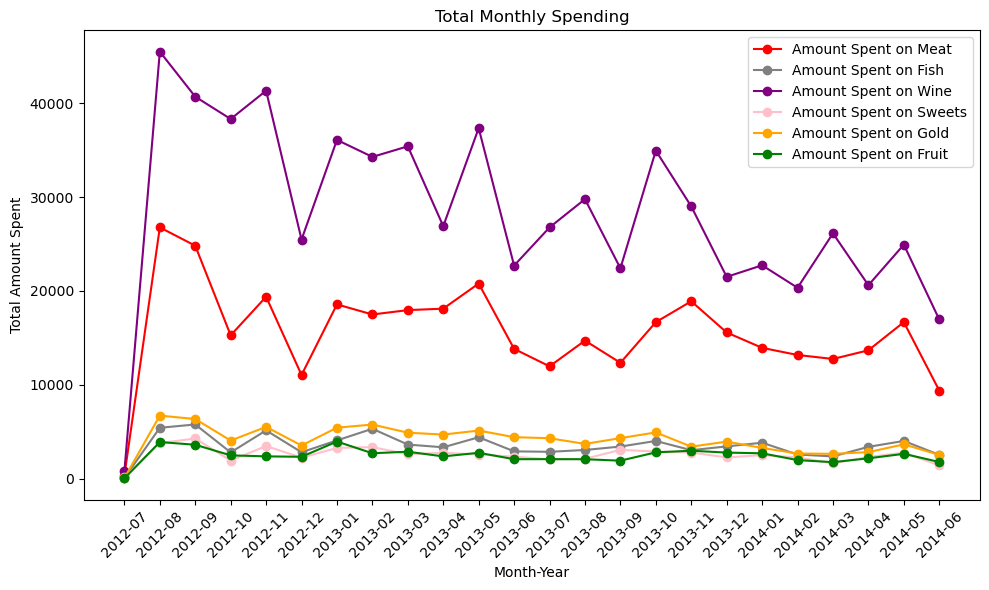

In [17]:
df['total_spent'] = df['MntMeatProducts'] + df['MntFishProducts'] + df['MntWines']  + df['MntFruits']  + df['MntSweetProducts'] + df['MntGoldProds']
monthly_spending = df.groupby(df['join_date'].dt.to_period('M')).agg({
    'MntMeatProducts': 'sum',
    'MntFishProducts': 'sum',
    'MntWines': 'sum',
    'MntFruits': 'sum',
    'MntSweetProducts': 'sum',
    'MntGoldProds': 'sum',
    'total_spent': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
categories = ['MntMeatProducts', 'MntFishProducts', 'MntWines', 'MntFruits', 'MntSweetProducts', 'MntGoldProds']
monthly_spending.set_index('join_date')[categories].plot(kind='bar', stacked=True, figsize=(14, 7))
plt.xlabel('Month-Year')
plt.ylabel('Total Amount Spent')
plt.title('Monthly Spending by Product Category')
plt.xticks(rotation=45)
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(monthly_spending['join_date'].astype(str), monthly_spending['MntMeatProducts'], color='red', marker='o', label='Amount Spent on Meat')
plt.plot(monthly_spending['join_date'].astype(str), monthly_spending['MntFishProducts'], color='grey', marker='o', label='Amount Spent on Fish')
plt.plot(monthly_spending['join_date'].astype(str), monthly_spending['MntWines'], color='purple', marker='o', label='Amount Spent on Wine')
plt.plot(monthly_spending['join_date'].astype(str), monthly_spending['MntSweetProducts'], color='pink', marker='o', label='Amount Spent on Sweets')
plt.plot(monthly_spending['join_date'].astype(str), monthly_spending['MntGoldProds'], color='orange', marker='o', label='Amount Spent on Gold')
plt.plot(monthly_spending['join_date'].astype(str), monthly_spending['MntFruits'], color='green', marker='o', label='Amount Spent on Fruit')
plt.xlabel('Month-Year')
plt.ylabel('Total Amount Spent')
plt.title('Total Monthly Spending')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

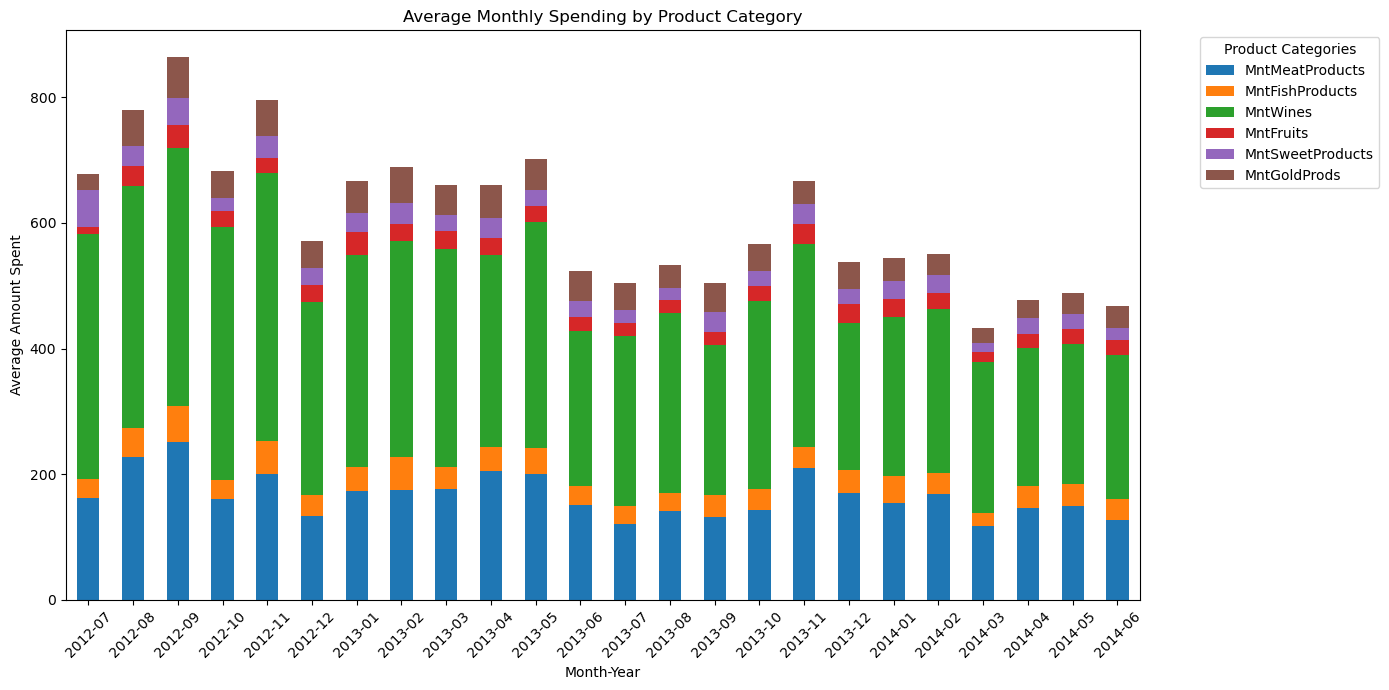

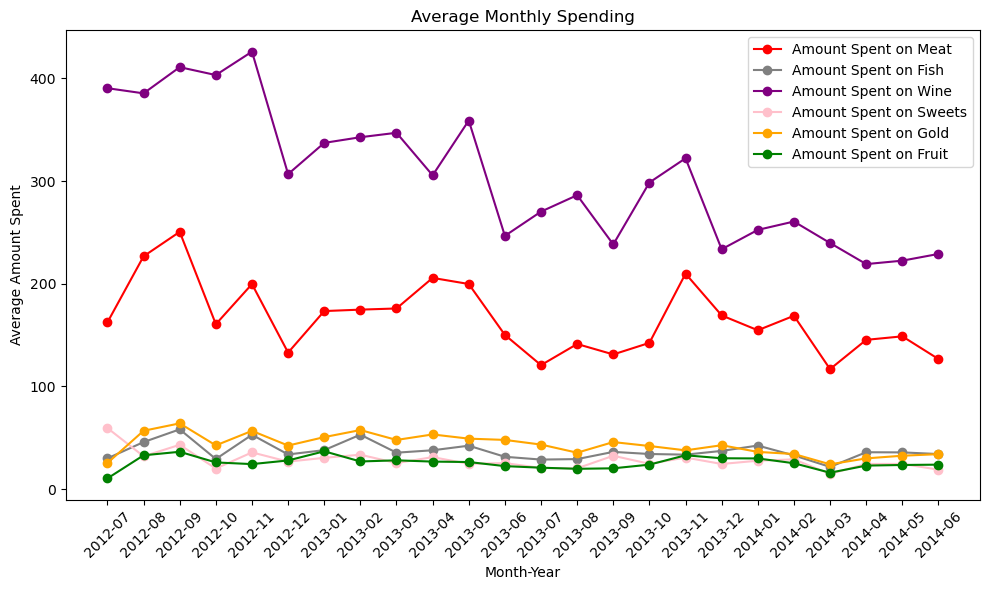

In [18]:
df['total_spent'] = df['MntMeatProducts'] + df['MntFishProducts'] + df['MntWines']  + df['MntFruits']  + df['MntSweetProducts'] + df['MntGoldProds']
monthly_spending = df.groupby(df['join_date'].dt.to_period('M')).agg({
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntWines': 'mean',
    'MntFruits': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean',
    'total_spent': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
categories = ['MntMeatProducts', 'MntFishProducts', 'MntWines', 'MntFruits', 'MntSweetProducts', 'MntGoldProds']
monthly_spending.set_index('join_date')[categories].plot(kind='bar', stacked=True, figsize=(14, 7))
plt.xlabel('Month-Year')
plt.ylabel('Average Amount Spent')
plt.title('Average Monthly Spending by Product Category')
plt.xticks(rotation=45)
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(monthly_spending['join_date'].astype(str), monthly_spending['MntMeatProducts'], color='red', marker='o', label='Amount Spent on Meat')
plt.plot(monthly_spending['join_date'].astype(str), monthly_spending['MntFishProducts'], color='grey', marker='o', label='Amount Spent on Fish')
plt.plot(monthly_spending['join_date'].astype(str), monthly_spending['MntWines'], color='purple', marker='o', label='Amount Spent on Wine')
plt.plot(monthly_spending['join_date'].astype(str), monthly_spending['MntSweetProducts'], color='pink', marker='o', label='Amount Spent on Sweets')
plt.plot(monthly_spending['join_date'].astype(str), monthly_spending['MntGoldProds'], color='orange', marker='o', label='Amount Spent on Gold')
plt.plot(monthly_spending['join_date'].astype(str), monthly_spending['MntFruits'], color='green', marker='o', label='Amount Spent on Fruit')
plt.xlabel('Month-Year')
plt.ylabel('Average Amount Spent')
plt.title('Average Monthly Spending')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


### The analysis of average monthly spending across product categories reveals that wine and meat products consistently account for the majority of total spending. Wine, in particular, shows the highest average spending each month, although it experiences a noticeable decline in 2013 and continues at a lower level through 2014. Meat spending remains stable, with some fluctuations, but it holds the position of the second-highest category throughout the period. On the other hand, categories like fish, sweets, fruits, and gold products contribute much less to the overall spending but remain consistent in their levels of contribution. These smaller categories show minimal variation and, while important, do not exhibit the same prominence or volatility as wine and meat. The stacked bar chart visually demonstrates that the combined contribution of wine and meat dominates the overall spending trends, with significant total spending seen in late 2012 and early 2013, before gradually tapering off in subsequent years.

### In terms of trends, there is a general decline in overall spending across all categories starting in early 2013, which continues into 2014. Despite this, wine and meat continue to be the leading categories, even as total spending declines. The lower contribution of fish, sweets, fruits, and gold products remains steady, with no major spikes or declines, indicating these are more stable, albeit smaller, components of monthly expenditures. These trends suggest that customer spending behavior may have shifted after 2013, and marketing efforts to reinvigorate spending could focus on maintaining or boosting engagement in the wine and meat categories. At the same time, opportunities to increase customer interest in the smaller categories could be explored to diversify and potentially enhance the overall spending profile.

In [19]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   object        
 3   marital_status       2240 non-null   object        
 4   income               2216 non-null   float64       
 5   dt_customer          2240 non-null   object        
 6   recency              2240 non-null   int64         
 7   mntwines             2240 non-null   int64         
 8   mntfruits            2240 non-null   int64         
 9   mntmeatproducts      2240 non-null   int64         
 10  mntfishproducts      2240 non-null   int64         
 11  mntsweetproducts     2240 non-null   int64         
 12  mntgoldprods         2240 non-null   int64         
 13  numdealspurchases    2240 non-nul

In [20]:
df.to_csv('marketing_campaign_processed.csv', index=False)